# Value-by-Alpha Choropleth

Value-by-Alpha Choropleth plotting with `mapclassify`


* *This notebook is adapted from one originally written by [@slumnitz](https://github.com/slumnitz)* in [the `splot` project](https://github.com/pysal/splot/blob/b8361cb5f4685d0945e08cbf9172ba701ce57c44/notebooks/mapping_vba.ipynb)

## Set up

### Imports

In [1]:
import geopandas
import libpysal
import matplotlib.pyplot as plt

### Data Preparation

Load example data into a `geopandas.GeoDataFrame` and inspect column names. In this example we will use the `columbus.shp` file containing neighborhood crime data of 1980.

In [2]:
link_to_data = libpysal.examples.get_path("columbus.shp")
gdf = geopandas.read_file(link_to_data)
gdf.columns

Index(['AREA', 'PERIMETER', 'COLUMBUS_', 'COLUMBUS_I', 'POLYID', 'NEIG',
       'HOVAL', 'INC', 'CRIME', 'OPEN', 'PLUMB', 'DISCBD', 'X', 'Y', 'NSA',
       'NSB', 'EW', 'CP', 'THOUS', 'NEIGNO', 'geometry'],
      dtype='object')

Our two variables of interest in `gdf`:
* `x`: `HOVAL` – housing value (in $1,000); the rgb variable
* `y`: `CRIME` – residential burglaries and vehicle thefts per 1000 households; the alpha variable

In [3]:
x = "HOVAL"
y = "CRIME"

## Create Value-by-Alpha Choropleths

### What is a Value by Alpha choropleth?

In a nutshell, a Value-by-Alpha Choropleth is a bivariate choropleth that uses the values of the second input variable `y` as a transparency mask, determining how much of the choropleth displaying the values of a first variable `x` is shown. In comparison to a cartogram, Value-By-Alpha choropleths will not distort shapes and sizes but modify the alpha channel (transparency) of polygons according to the second input variable `y`.

Let's look at a couple of examples.

In [4]:
from mapclassify.value_by_alpha import vba_choropleth

We can create a value by alpha map using `vba_choropleth`.

We will plot a Value-by-Alpha Choropleth with `x` (`HOVAL`) defining the rgb values and `y` (`CRIME`) defining the alpha value. For comparison we plot a choropleth of `x` with `gdf.plot()`:

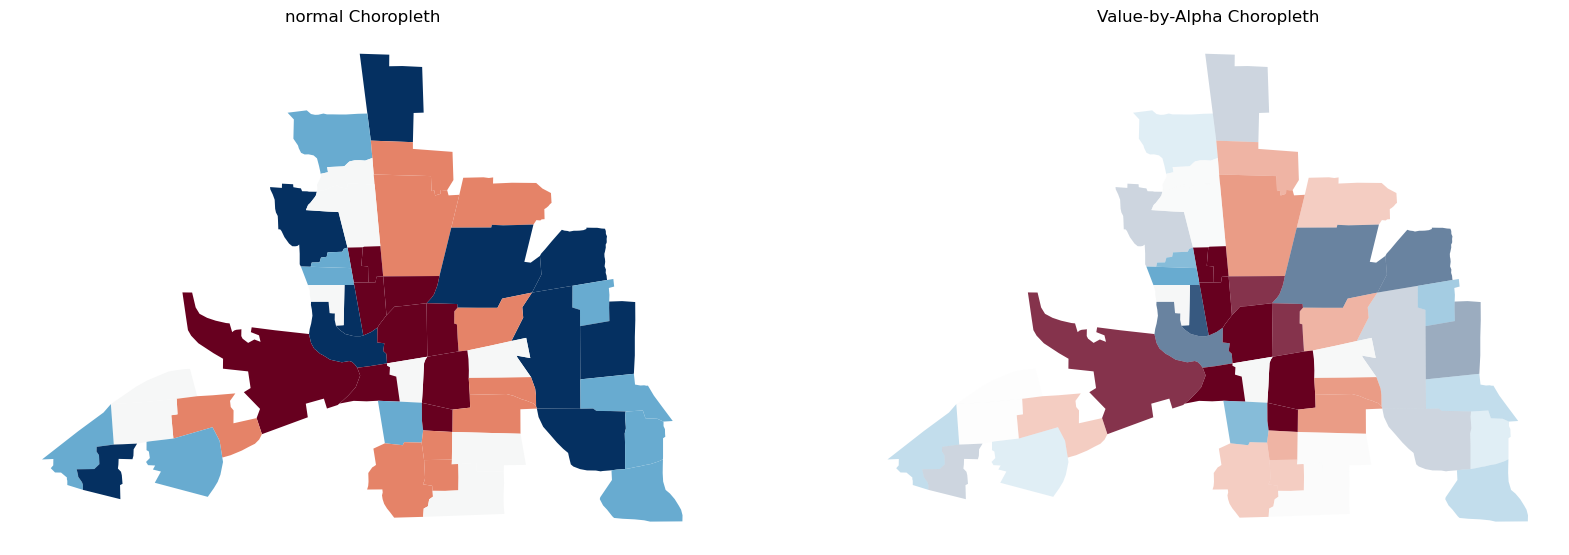

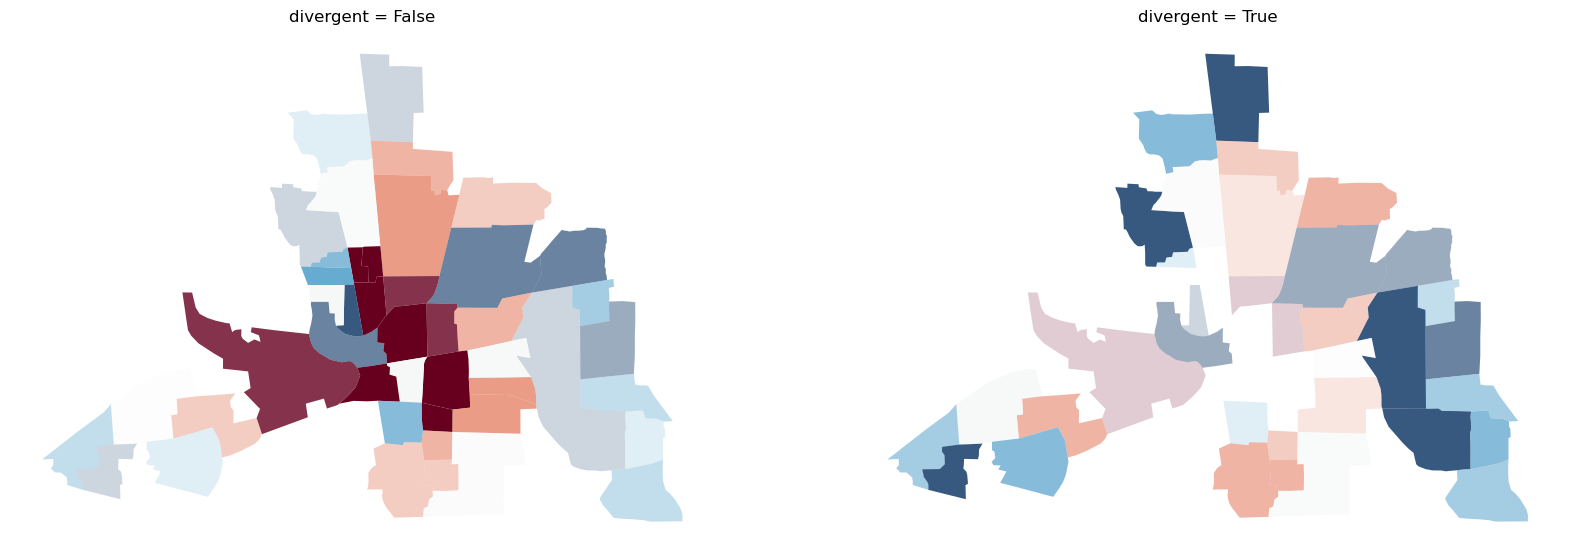

In [5]:
# Create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# use gdf.plot() to create regular choropleth
axs[0].set_title("normal Choropleth")
axs[0].set_axis_off()
gdf.plot(column=x, scheme="quantiles", cmap="RdBu", ax=axs[0])

# use vba_choropleth to create Value-by-Alpha Choropleth
axs[1].set_title("Value-by-Alpha Choropleth")
vba_choropleth(
    x,
    y,
    gdf,
    rgb={"classifier": "quantiles"},
    alpha={"classifier": "quantiles"},
    cmap="RdBu",
    ax=axs[1],
)

# Create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# create a VBA Choropleth - revert_alpha=False
axs[0].set_title("divergent = False")
vba_choropleth(
    x,
    y,
    gdf,
    rgb={"classifier": "quantiles"},
    alpha={"classifier": "quantiles"},
    cmap="RdBu",
    ax=axs[0],
    revert_alpha=False,
)

# create a VBA Choropleth - revert_alpha=True
axs[1].set_title("divergent = True")
vba_choropleth(
    x,
    y,
    gdf,
    rgb={"classifier": "quantiles"},
    alpha={"classifier": "quantiles"},
    cmap="RdBu",
    ax=axs[1],
    revert_alpha=True,
)

plt.show()

You can see the original choropleth is fading into transparency wherever there is a high `y` value.

#### Classification & binning options

You can use the option to bin or classify your `x` and `y` values, and display the alternative color and alpha ranges:

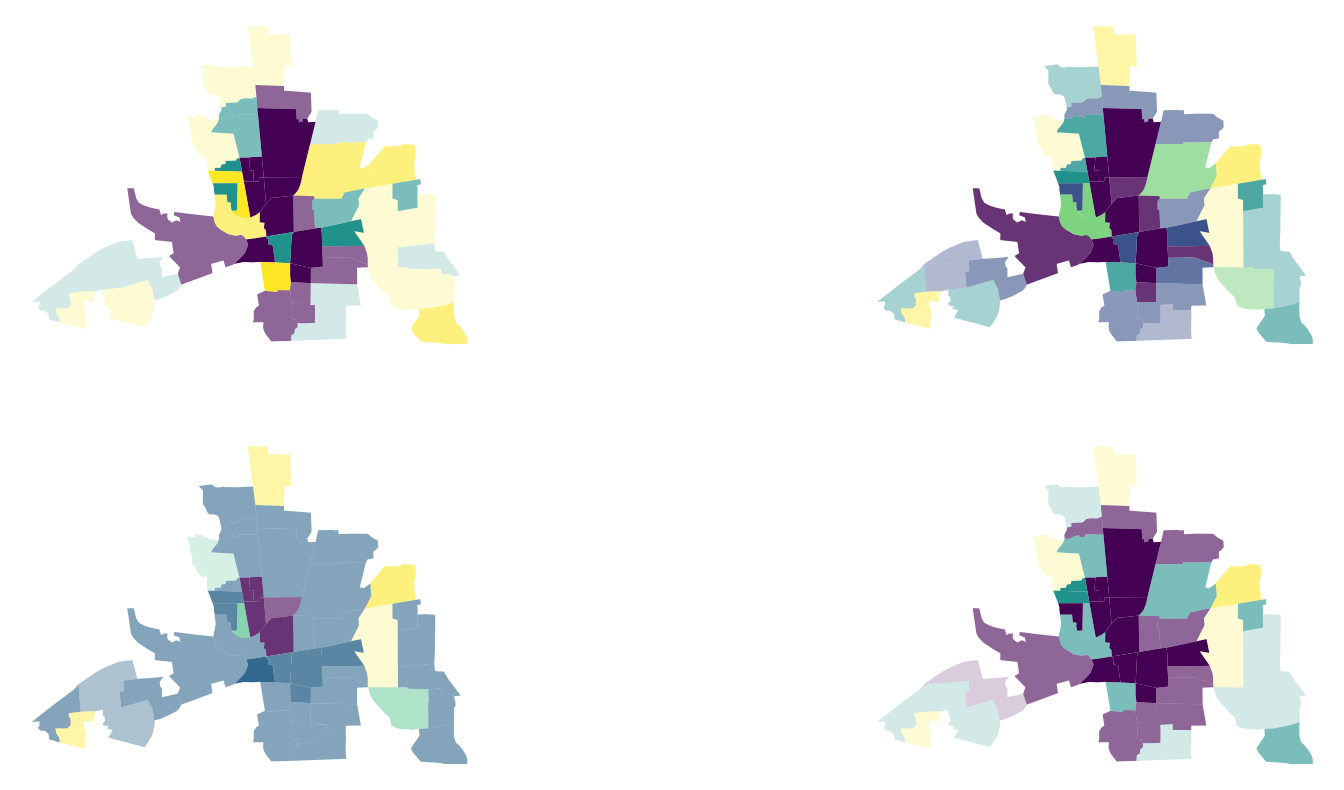

In [6]:
# Create new figure
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# classify with Quantiles
vba_choropleth(
    x,
    y,
    gdf,
    cmap="viridis",
    ax=axs[0, 0],
    rgb=dict(classifier="quantiles", k=3),
    alpha=dict(classifier="quantiles", k=3),
)

# classifier with Natural Breaks
vba_choropleth(
    x,
    y,
    gdf,
    cmap="viridis",
    ax=axs[0, 1],
    rgb=dict(classifier="natural_breaks"),
    alpha=dict(classifier="natural_breaks"),
)

# classify with Standard Deviation Mean
vba_choropleth(
    x,
    y,
    gdf,
    cmap="viridis",
    ax=axs[1, 0],
    rgb=dict(classifier="std_mean"),
    alpha=dict(classifier="std_mean"),
)

# classify with Fisher Jenks
vba_choropleth(
    x,
    y,
    gdf,
    cmap="viridis",
    ax=axs[1, 1],
    rgb=dict(classifier="fisher_jenks", k=3),
    alpha=dict(classifier="fisher_jenks", k=3),
)

plt.show()

### User-defined colors

Instead of using a colormap you can also pass a list of colors:

In [7]:
color_list = ["#a1dab4", "#41b6c4", "#225ea8"]

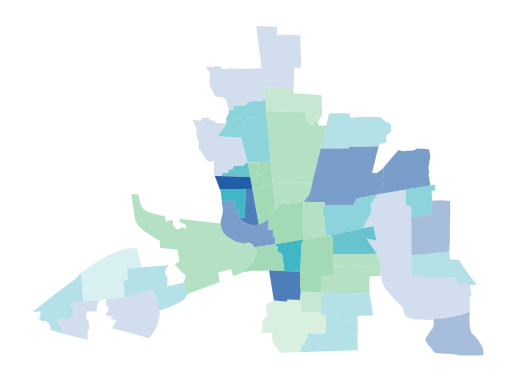

In [8]:
vba_choropleth(
    x,
    y,
    gdf,
    cmap=color_list,
    rgb={"classifier": "quantiles", "k": 3},
    alpha={"classifier": "quantiles"},
)

plt.show()

### Transposing transparency

Sometimes it is important in geospatial analysis to actually see the high values and let the small values fade out. With the `revert_alpha = True` argument, you can revert the transparency of the `y` values so that high `y` values will more transparent and low values will more opaque.

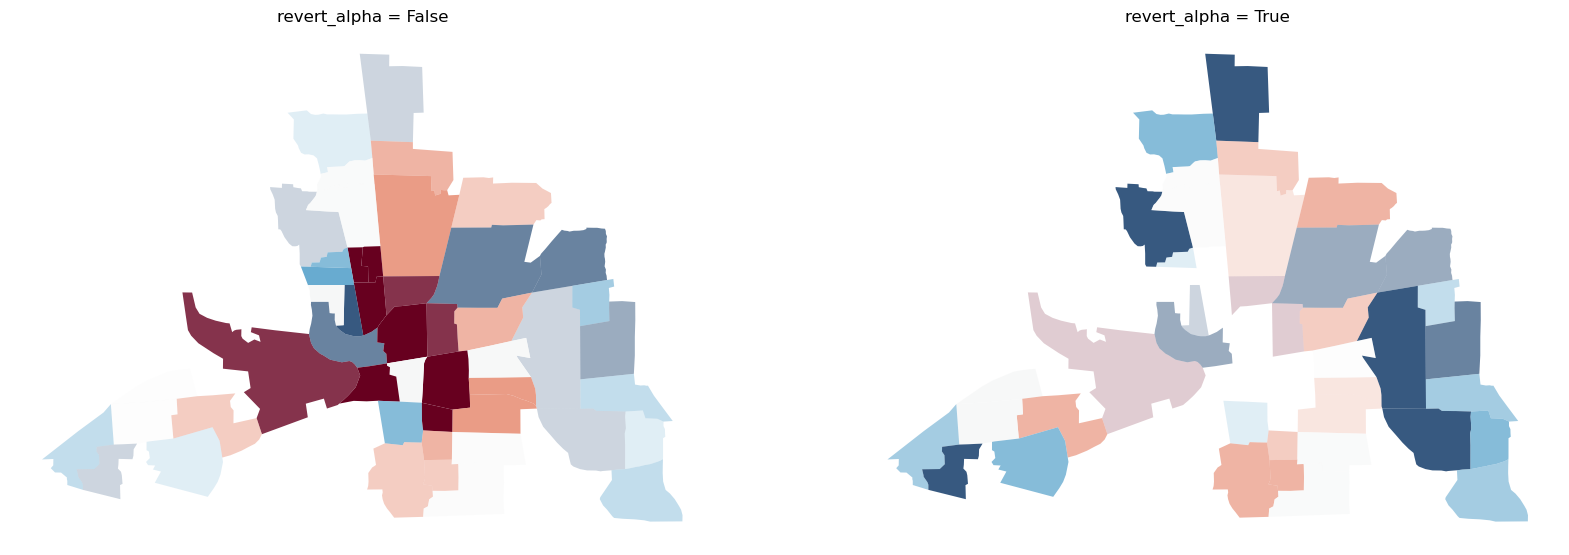

In [9]:
# Create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# create a vba_choropleth
axs[0].set_title("revert_alpha = False")
vba_choropleth(
    x,
    y,
    gdf,
    rgb=dict(classifier="quantiles"),
    alpha=dict(classifier="quantiles"),
    cmap="RdBu",
    ax=axs[0],
    revert_alpha=False,
)

# set revert_alpha argument to True
axs[1].set_title("revert_alpha = True")
vba_choropleth(
    x,
    y,
    gdf,
    rgb=dict(classifier="quantiles"),
    alpha=dict(classifier="quantiles"),
    cmap="RdBu",
    ax=axs[1],
    revert_alpha=True,
)

plt.show()

### Displaying divergency

You can use the `divergent` argument to display divergent alpha values. This means values at the extremes of your data range will be displayed with an alpha value of 1. Values towards the middle of your data range will be mapped increasingly transparent approaching an alpha value of 0.

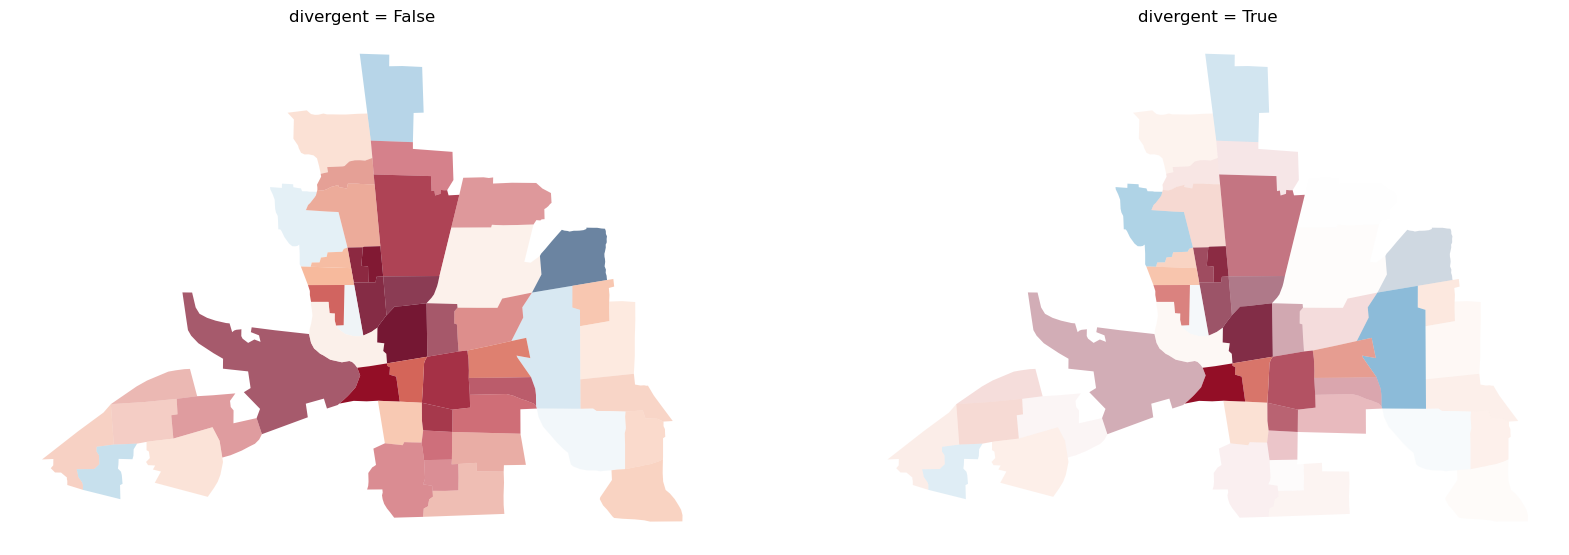

In [10]:
# create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# create a vba_choropleth
axs[0].set_title("divergent = False")
axs[0].set_axis_off()
vba_choropleth(x, y, gdf, cmap="RdBu", divergent=False, ax=axs[0])

# set divergent to True
axs[1].set_title("divergent = True")
vba_choropleth(x, y, gdf, cmap="RdBu", divergent=True, ax=axs[1])

plt.show()

## Create your own cmap for plotting

### Colormap shifting

Sometimes you need to display divergent values with a natural midpoint not overlapping with the median of your data. For example, if you measure the temperature over a country ranging from -2 to 10 degrees Celsius. Or if you need to assess whether a certain threshold is reached.

For cases like this, we can use `shift_colormap`.

In [11]:
from mapclassify.value_by_alpha import shift_colormap

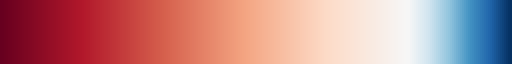

In [12]:
# shift the midpoint to the 80th percentile of your datarange
mid08 = shift_colormap("RdBu", midpoint=0.8, name="RdBu_08")
mid08

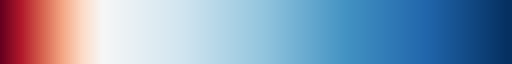

In [13]:
# shift the midpoint to the 20th percentile of your datarange
mid02 = shift_colormap("RdBu", midpoint=0.2, name="RdBu_02")
mid02

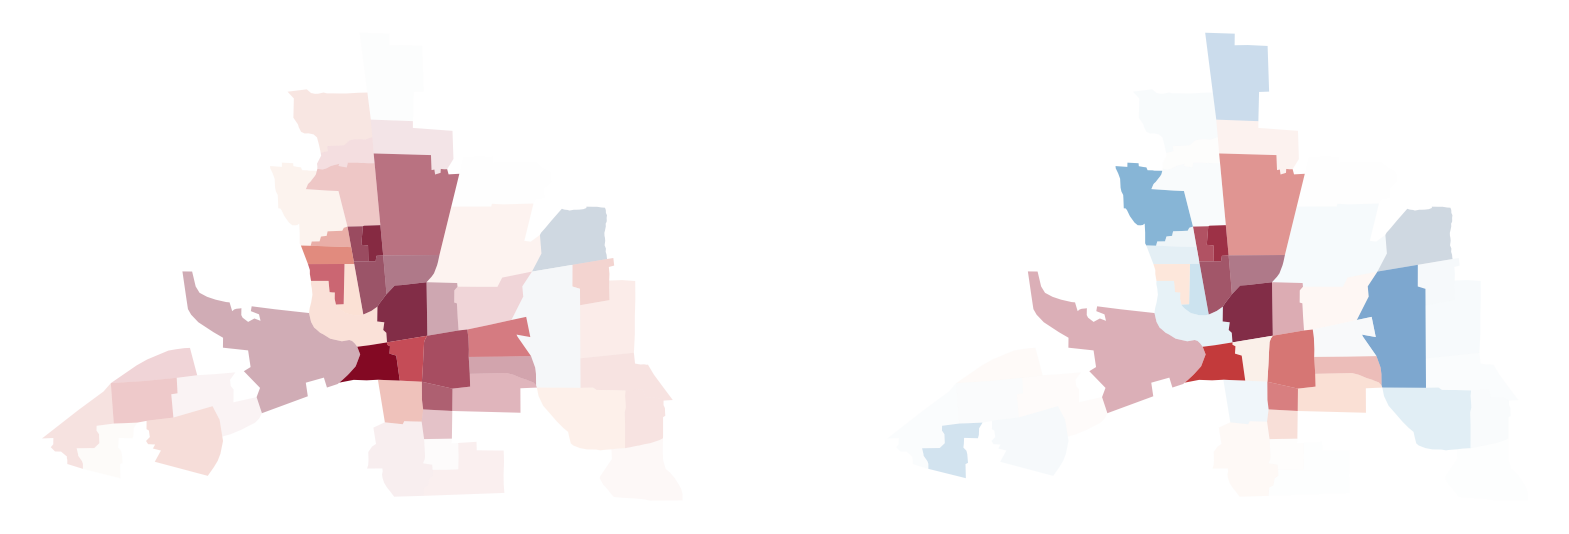

In [14]:
# create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# vba_choropleth with cmap mid08
vba_choropleth(x, y, gdf, cmap=mid08, ax=axs[0], divergent=True)

# vba_choropleth with cmap mid02
vba_choropleth(x, y, gdf, cmap=mid02, ax=axs[1], divergent=True)

plt.show()

### Colormap truncation

You may also want to truncate minimum and maximum values for demonstrative or merely aesthetic purposes.

For cases like this, we can use `truncate_colormap`.

In [15]:
from mapclassify.value_by_alpha import truncate_colormap

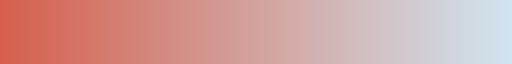

In [16]:
# truncate to the 20th-60th percentile of your datarange
trunc0206 = truncate_colormap("RdBu", minval=0.2, maxval=0.6, n=2)
trunc0206

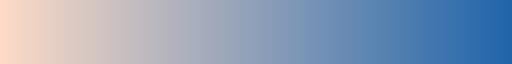

In [17]:
# truncate to the 40th-90th percentile of your datarange
trunc0409 = truncate_colormap("RdBu", minval=0.4, maxval=0.9, n=2)
trunc0409

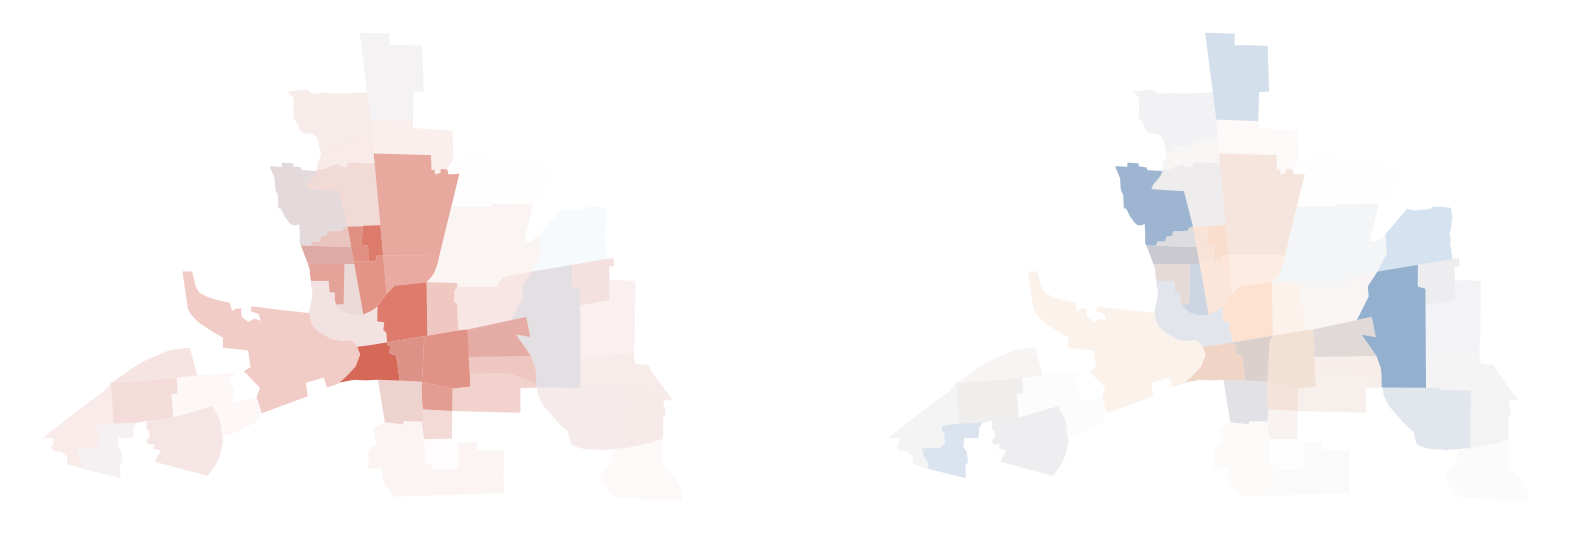

In [18]:
# create new figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# vba_choropleth with cmap trunc0206
vba_choropleth(x, y, gdf, cmap=trunc0206, ax=axs[0], divergent=True)

# vba_choropleth with cmap trunc0409
vba_choropleth(x, y, gdf, cmap=trunc0409, ax=axs[1], divergent=True)

plt.show()

## Add a legend

If your values are classified, you have the option to add a legend to your map.

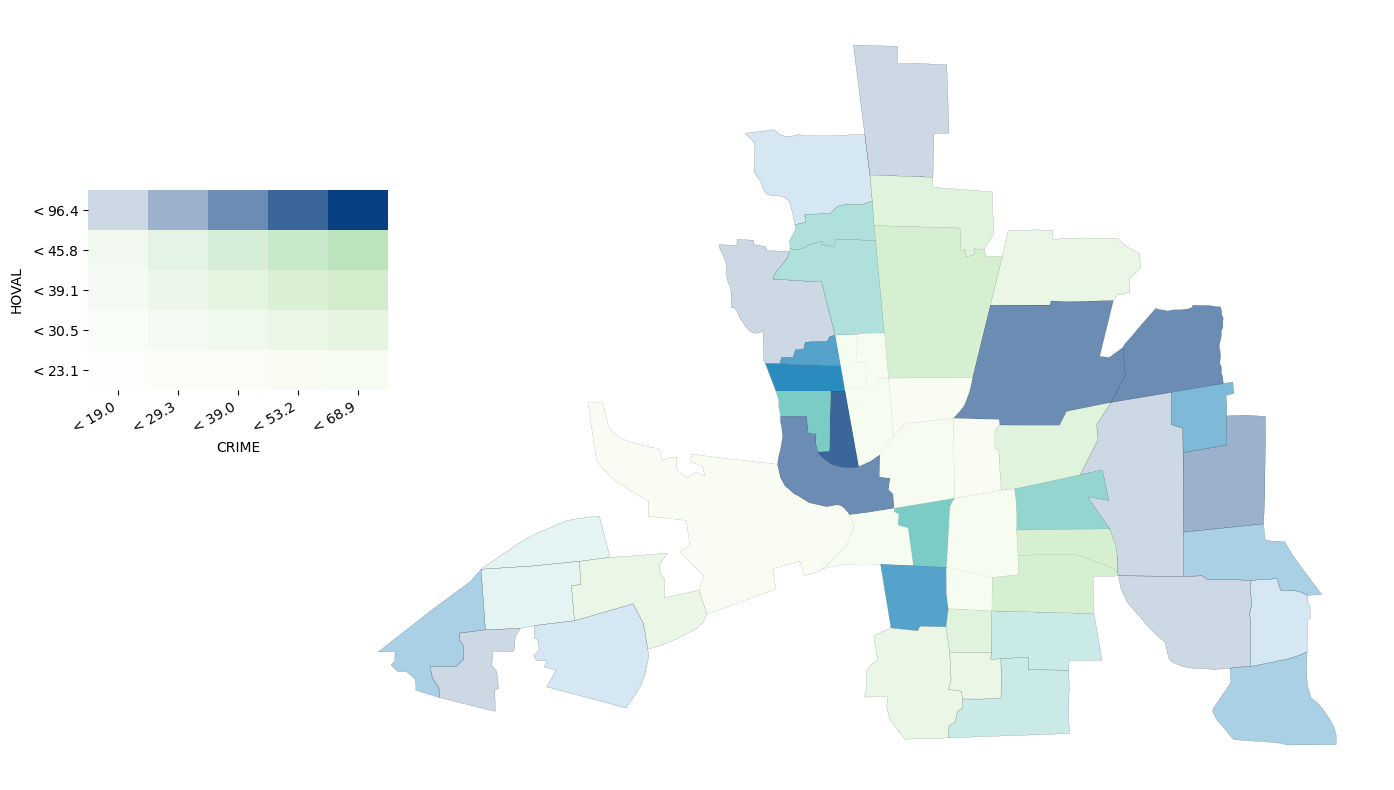

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

gdf.plot(ax=ax, fc="none", ec="k", lw=0.1)
vba_choropleth(
    x,
    y,
    gdf,
    ax=ax,
    alpha={"classifier": "quantiles", "k": 5},
    rgb={"classifier": "quantiles", "k": 5},
    legend=True,
    legend_kwargs={"alpha_label": y, "rgb_label": x},
)

plt.show()